# 0. Install and Import dependencies

In [1]:
!pip install stable-baselines3 gym-anytrading gym yfinance

In [2]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Data Retrival stuff
import yfinance as yf

/Users/lomagnoc/Documents/Backup from Old Mac/Projects/deep-reinforcement-learning-trader/venv/lib/python3.9/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/lomagnoc/Documents/Backup from Old Mac/Projects/deep-reinforcement-learning-trader/venv/lib/python3.9/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/lomagnoc/Documents/Backup from Old Mac/Projects/deep-reinforcement-learning-trader/venv/lib/python3.9/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated;

# 1. Bring in Marketwatch GME Data 

In [3]:
msft = yf.Ticker("TSLA")
df = msft.history(period="max")

In [4]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [5]:
df.sort_values('Date', ascending=True, inplace=True)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [6]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,250), window_size=5)

In [7]:
env.signal_features

array([[ 4.77799988e+00,  0.00000000e+00],
       [ 4.76599979e+00, -1.20000839e-02],
       [ 4.39200020e+00, -3.73999596e-01],
       [ 3.83999991e+00, -5.52000284e-01],
       [ 3.22199988e+00, -6.18000031e-01],
       [ 3.16000009e+00, -6.19997978e-02],
       [ 3.49200010e+00,  3.32000017e-01],
       [ 3.48000002e+00, -1.20000839e-02],
       [ 3.41000009e+00, -6.99999332e-02],
       [ 3.62800002e+00,  2.17999935e-01],
       [ 3.96799994e+00,  3.39999914e-01],
       [ 3.97799993e+00,  9.99999046e-03],
       [ 4.12799978e+00,  1.49999857e-01],
       [ 4.38199997e+00,  2.54000187e-01],
       [ 4.05999994e+00, -3.22000027e-01],
       [ 4.04400015e+00, -1.59997940e-02],
       [ 4.19999981e+00,  1.55999660e-01],
       [ 4.25799990e+00,  5.80000877e-02],
       [ 4.19000006e+00, -6.79998398e-02],
       [ 4.11000013e+00, -7.99999237e-02],
       [ 4.14400005e+00,  3.39999199e-02],
       [ 4.07000017e+00, -7.39998817e-02],
       [ 3.98799992e+00, -8.20002556e-02],
       [ 4.

# 2. Build Environment

In [8]:
env.action_space

Discrete(2)

info {'total_reward': 2.175999164581299, 'total_profit': 0.6360269449548974, 'position': 0}


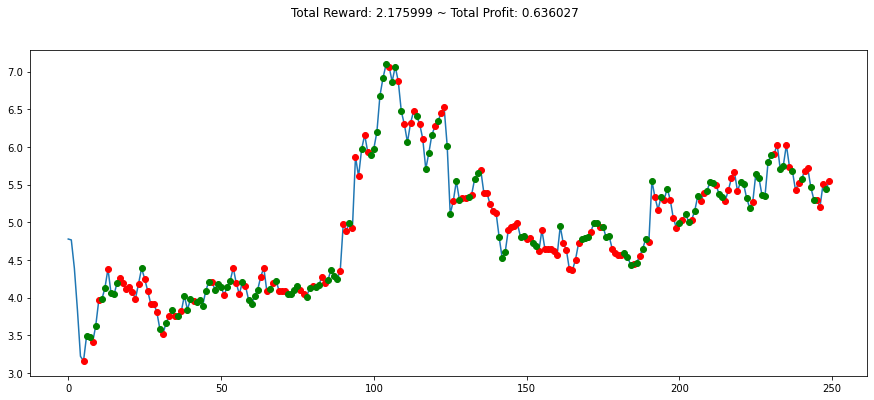

In [9]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# 2.1 Add Custom Indicators

## 2.1.1. Install and Import New Dependencies

In [10]:
!pip install finta

In [11]:
from gym_anytrading.envs import StocksEnv
from finta import TA

## 2.1.2. Fix Volume Column

In [12]:
df['Volume'] = df['Volume'].apply(lambda x: float(x))

In [13]:
df.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume          float64
Dividends         int64
Stock Splits    float64
dtype: object

## 2.1.3. Calculate SMA, RSI and OBV

In [14]:
df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace=True)

In [15]:
df.head(15)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA,RSI,OBV
Date,,,,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500.0,0,0.0,0.000000,0.000000,0.0
2010-06-30,5.158,6.084,4.660,4.766,85935500.0,0,0.0,0.000000,0.000000,-85935500.0
2010-07-01,5.000,5.184,4.054,4.392,41094000.0,0,0.0,0.000000,0.000000,-127029500.0
2010-07-02,4.600,4.620,3.742,3.840,25699000.0,0,0.0,0.000000,0.000000,-152728500.0
2010-07-06,4.000,4.000,3.166,3.222,34334500.0,0,0.0,0.000000,0.000000,-187063000.0
2010-07-07,3.280,3.326,2.996,3.160,34608500.0,0,0.0,0.000000,0.000000,-221671500.0
2010-07-08,3.228,3.504,3.114,3.492,38557000.0,0,0.0,0.000000,20.112176,-183114500.0
2010-07-09,3.516,3.580,3.310,3.480,20253000.0,0,0.0,0.000000,19.955946,-203367500.0
2010-07-12,3.590,3.614,3.400,3.410,11012500.0,0,0.0,0.000000,19.027447,-214380000.0


## 2.1.4. Create New Environments

In [16]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [17]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(1600,1800))

In [18]:
env2.signal_features

array([[3.86520004e+01, 2.84025000e+07, 4.03924999e+01, 4.47428411e+01,
        1.22537650e+09],
       [3.96119995e+01, 3.49560000e+07, 4.02234999e+01, 5.01075168e+01,
        1.26033250e+09],
       [3.94099998e+01, 2.53645000e+07, 4.00183331e+01, 4.53644894e+01,
        1.23496800e+09],
       ...,
       [7.03180008e+01, 2.51385000e+07, 7.11340008e+01, 5.23434816e+01,
        2.00111900e+09],
       [6.91600037e+01, 2.70410000e+07, 7.14935004e+01, 4.96546995e+01,
        1.97407800e+09],
       [6.63700027e+01, 3.24770000e+07, 7.13396670e+01, 4.43713057e+01,
        1.94160100e+09]])

In [19]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA,RSI,OBV
Date,,,,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500.0,0,0.0,0.0,0.0,0.0
2010-06-30,5.158,6.084,4.660,4.766,85935500.0,0,0.0,0.0,0.0,-85935500.0
2010-07-01,5.000,5.184,4.054,4.392,41094000.0,0,0.0,0.0,0.0,-127029500.0
2010-07-02,4.600,4.620,3.742,3.840,25699000.0,0,0.0,0.0,0.0,-152728500.0
2010-07-06,4.000,4.000,3.166,3.222,34334500.0,0,0.0,0.0,0.0,-187063000.0


# 3. Build Environment and Train

In [20]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [26]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

Wrapping the env in a DummyVecEnv.
---------------------------------
| explained_variance | -0.00768 |
| fps                | 48       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 7.19     |
---------------------------------
---------------------------------
| explained_variance | -11.2    |
| fps                | 1060     |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 1.1e-05  |
---------------------------------
---------------------------------
| explained_variance | -0.00152 |
| fps                | 1175     |
| nupdates           | 200      |
| policy_entropy     | 0.692    |
| total_timesteps    | 1000     |
| value_loss         | 26.3     |
---------------------------------
---------------------------------
| explained_variance | -4.38    |
| fps                | 1218     |
| nupdates           | 300      |
| policy_entr

---------------------------------
| explained_variance | -0.00257 |
| fps                | 1257     |
| nupdates           | 3000     |
| policy_entropy     | 0.684    |
| total_timesteps    | 15000    |
| value_loss         | 110      |
---------------------------------
---------------------------------
| explained_variance | -0.927   |
| fps                | 1256     |
| nupdates           | 3100     |
| policy_entropy     | 0.593    |
| total_timesteps    | 15500    |
| value_loss         | 8.8      |
---------------------------------
---------------------------------
| explained_variance | 0.00166  |
| fps                | 1256     |
| nupdates           | 3200     |
| policy_entropy     | 0.688    |
| total_timesteps    | 16000    |
| value_loss         | 81.9     |
---------------------------------
---------------------------------
| explained_variance | -0.0553  |
| fps                | 1254     |
| nupdates           | 3300     |
| policy_entropy     | 0.677    |
| total_timest

---------------------------------
| explained_variance | -0.83    |
| fps                | 1283     |
| nupdates           | 6100     |
| policy_entropy     | 0.693    |
| total_timesteps    | 30500    |
| value_loss         | 0.0664   |
---------------------------------
---------------------------------
| explained_variance | -0.104   |
| fps                | 1284     |
| nupdates           | 6200     |
| policy_entropy     | 0.686    |
| total_timesteps    | 31000    |
| value_loss         | 1.08     |
---------------------------------
---------------------------------
| explained_variance | 0.00798  |
| fps                | 1285     |
| nupdates           | 6300     |
| policy_entropy     | 0.668    |
| total_timesteps    | 31500    |
| value_loss         | 122      |
---------------------------------
---------------------------------
| explained_variance | -0.00448 |
| fps                | 1286     |
| nupdates           | 6400     |
| policy_entropy     | 0.677    |
| total_timest

---------------------------------
| explained_variance | -0.00261 |
| fps                | 1304     |
| nupdates           | 9200     |
| policy_entropy     | 0.668    |
| total_timesteps    | 46000    |
| value_loss         | 1.08e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.000321 |
| fps                | 1304     |
| nupdates           | 9300     |
| policy_entropy     | 0.652    |
| total_timesteps    | 46500    |
| value_loss         | 562      |
---------------------------------
---------------------------------
| explained_variance | 0.154    |
| fps                | 1305     |
| nupdates           | 9400     |
| policy_entropy     | 0.653    |
| total_timesteps    | 47000    |
| value_loss         | 0.0831   |
---------------------------------
---------------------------------
| explained_variance | 0.0046   |
| fps                | 1305     |
| nupdates           | 9500     |
| policy_entropy     | 0.552    |
| total_timest

---------------------------------
| explained_variance | -0.141   |
| fps                | 1312     |
| nupdates           | 12300    |
| policy_entropy     | 0.557    |
| total_timesteps    | 61500    |
| value_loss         | 1.05     |
---------------------------------
---------------------------------
| explained_variance | 0.000426 |
| fps                | 1313     |
| nupdates           | 12400    |
| policy_entropy     | 0.688    |
| total_timesteps    | 62000    |
| value_loss         | 1.11e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.0185   |
| fps                | 1313     |
| nupdates           | 12500    |
| policy_entropy     | 0.501    |
| total_timesteps    | 62500    |
| value_loss         | 18.3     |
---------------------------------
---------------------------------
| explained_variance | -0.00388 |
| fps                | 1313     |
| nupdates           | 12600    |
| policy_entropy     | 0.617    |
| total_timest

---------------------------------
| explained_variance | 0.03     |
| fps                | 1318     |
| nupdates           | 15400    |
| policy_entropy     | 0.301    |
| total_timesteps    | 77000    |
| value_loss         | 2.8      |
---------------------------------
---------------------------------
| explained_variance | 0.388    |
| fps                | 1319     |
| nupdates           | 15500    |
| policy_entropy     | 0.0961   |
| total_timesteps    | 77500    |
| value_loss         | 0.0113   |
---------------------------------
---------------------------------
| explained_variance | -3.1     |
| fps                | 1319     |
| nupdates           | 15600    |
| policy_entropy     | 0.542    |
| total_timesteps    | 78000    |
| value_loss         | 25       |
---------------------------------
---------------------------------
| explained_variance | -0.00143 |
| fps                | 1319     |
| nupdates           | 15700    |
| policy_entropy     | 0.209    |
| total_timest

---------------------------------
| explained_variance | 0.0687   |
| fps                | 1323     |
| nupdates           | 18500    |
| policy_entropy     | 0.177    |
| total_timesteps    | 92500    |
| value_loss         | 0.479    |
---------------------------------
---------------------------------
| explained_variance | 0.0173   |
| fps                | 1323     |
| nupdates           | 18600    |
| policy_entropy     | 0.0612   |
| total_timesteps    | 93000    |
| value_loss         | 23.1     |
---------------------------------
---------------------------------
| explained_variance | 0.186    |
| fps                | 1323     |
| nupdates           | 18700    |
| policy_entropy     | 0.153    |
| total_timesteps    | 93500    |
| value_loss         | 0.262    |
---------------------------------
---------------------------------
| explained_variance | 0.00169  |
| fps                | 1323     |
| nupdates           | 18800    |
| policy_entropy     | 0.036    |
| total_timest

---------------------------------
| explained_variance | 0.0437   |
| fps                | 1317     |
| nupdates           | 21600    |
| policy_entropy     | 0.0923   |
| total_timesteps    | 108000   |
| value_loss         | 62.9     |
---------------------------------
---------------------------------
| explained_variance | -0.0678  |
| fps                | 1317     |
| nupdates           | 21700    |
| policy_entropy     | 0.0213   |
| total_timesteps    | 108500   |
| value_loss         | 7.29     |
---------------------------------
---------------------------------
| explained_variance | 0.026    |
| fps                | 1317     |
| nupdates           | 21800    |
| policy_entropy     | 0.026    |
| total_timesteps    | 109000   |
| value_loss         | 153      |
---------------------------------
---------------------------------
| explained_variance | -0.5     |
| fps                | 1317     |
| nupdates           | 21900    |
| policy_entropy     | 0.0338   |
| total_timest

---------------------------------
| explained_variance | 0.0238   |
| fps                | 1313     |
| nupdates           | 24700    |
| policy_entropy     | 0.0155   |
| total_timesteps    | 123500   |
| value_loss         | 48.3     |
---------------------------------
---------------------------------
| explained_variance | -0.136   |
| fps                | 1314     |
| nupdates           | 24800    |
| policy_entropy     | 0.0212   |
| total_timesteps    | 124000   |
| value_loss         | 3.4      |
---------------------------------
---------------------------------
| explained_variance | 0.0129   |
| fps                | 1314     |
| nupdates           | 24900    |
| policy_entropy     | 0.00891  |
| total_timesteps    | 124500   |
| value_loss         | 121      |
---------------------------------
---------------------------------
| explained_variance | 0.251    |
| fps                | 1314     |
| nupdates           | 25000    |
| policy_entropy     | 0.0211   |
| total_timest

---------------------------------
| explained_variance | -0.0259  |
| fps                | 1316     |
| nupdates           | 27800    |
| policy_entropy     | 0.0176   |
| total_timesteps    | 139000   |
| value_loss         | 99.7     |
---------------------------------
---------------------------------
| explained_variance | -0.39    |
| fps                | 1316     |
| nupdates           | 27900    |
| policy_entropy     | 0.0563   |
| total_timesteps    | 139500   |
| value_loss         | 1.18     |
---------------------------------
---------------------------------
| explained_variance | -0.0306  |
| fps                | 1316     |
| nupdates           | 28000    |
| policy_entropy     | 0.00874  |
| total_timesteps    | 140000   |
| value_loss         | 152      |
---------------------------------
---------------------------------
| explained_variance | 0.537    |
| fps                | 1316     |
| nupdates           | 28100    |
| policy_entropy     | 0.0837   |
| total_timest

---------------------------------
| explained_variance | 0.00141  |
| fps                | 1318     |
| nupdates           | 30900    |
| policy_entropy     | 0.00451  |
| total_timesteps    | 154500   |
| value_loss         | 4.41e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.0538   |
| fps                | 1318     |
| nupdates           | 31000    |
| policy_entropy     | 0.0104   |
| total_timesteps    | 155000   |
| value_loss         | 221      |
---------------------------------
---------------------------------
| explained_variance | -0.00025 |
| fps                | 1318     |
| nupdates           | 31100    |
| policy_entropy     | 0.00453  |
| total_timesteps    | 155500   |
| value_loss         | 231      |
---------------------------------
---------------------------------
| explained_variance | 0.059    |
| fps                | 1318     |
| nupdates           | 31200    |
| policy_entropy     | 0.0101   |
| total_timest

---------------------------------
| explained_variance | -0.0584  |
| fps                | 1320     |
| nupdates           | 34000    |
| policy_entropy     | 0.0195   |
| total_timesteps    | 170000   |
| value_loss         | 74.1     |
---------------------------------
---------------------------------
| explained_variance | 0.0265   |
| fps                | 1320     |
| nupdates           | 34100    |
| policy_entropy     | 0.00993  |
| total_timesteps    | 170500   |
| value_loss         | 236      |
---------------------------------
---------------------------------
| explained_variance | 0.0348   |
| fps                | 1320     |
| nupdates           | 34200    |
| policy_entropy     | 0.00892  |
| total_timesteps    | 171000   |
| value_loss         | 1.79     |
---------------------------------
---------------------------------
| explained_variance | 0.00789  |
| fps                | 1320     |
| nupdates           | 34300    |
| policy_entropy     | 0.0262   |
| total_timest

---------------------------------
| explained_variance | -0.687   |
| fps                | 1320     |
| nupdates           | 37100    |
| policy_entropy     | 0.035    |
| total_timesteps    | 185500   |
| value_loss         | 5.89     |
---------------------------------
---------------------------------
| explained_variance | 0.0166   |
| fps                | 1320     |
| nupdates           | 37200    |
| policy_entropy     | 0.019    |
| total_timesteps    | 186000   |
| value_loss         | 581      |
---------------------------------
---------------------------------
| explained_variance | 0.806    |
| fps                | 1320     |
| nupdates           | 37300    |
| policy_entropy     | 0.162    |
| total_timesteps    | 186500   |
| value_loss         | 0.215    |
---------------------------------
---------------------------------
| explained_variance | 0.0144   |
| fps                | 1320     |
| nupdates           | 37400    |
| policy_entropy     | 0.272    |
| total_timest

---------------------------------
| explained_variance | 0.382    |
| fps                | 1318     |
| nupdates           | 40200    |
| policy_entropy     | 0.0116   |
| total_timesteps    | 201000   |
| value_loss         | 0.0608   |
---------------------------------
---------------------------------
| explained_variance | 0.00564  |
| fps                | 1317     |
| nupdates           | 40300    |
| policy_entropy     | 0.0067   |
| total_timesteps    | 201500   |
| value_loss         | 391      |
---------------------------------
---------------------------------
| explained_variance | -0.133   |
| fps                | 1317     |
| nupdates           | 40400    |
| policy_entropy     | 0.0113   |
| total_timesteps    | 202000   |
| value_loss         | 4.03     |
---------------------------------
---------------------------------
| explained_variance | -0.0334  |
| fps                | 1317     |
| nupdates           | 40500    |
| policy_entropy     | 0.00571  |
| total_timest

---------------------------------
| explained_variance | -0.0316  |
| fps                | 1317     |
| nupdates           | 43300    |
| policy_entropy     | 0.00969  |
| total_timesteps    | 216500   |
| value_loss         | 50.9     |
---------------------------------
---------------------------------
| explained_variance | 0.149    |
| fps                | 1317     |
| nupdates           | 43400    |
| policy_entropy     | 0.00911  |
| total_timesteps    | 217000   |
| value_loss         | 5.08     |
---------------------------------
---------------------------------
| explained_variance | -0.016   |
| fps                | 1317     |
| nupdates           | 43500    |
| policy_entropy     | 0.0114   |
| total_timesteps    | 217500   |
| value_loss         | 32.6     |
---------------------------------
---------------------------------
| explained_variance | 0.165    |
| fps                | 1317     |
| nupdates           | 43600    |
| policy_entropy     | 0.0107   |
| total_timest

---------------------------------
| explained_variance | 0.00436  |
| fps                | 1318     |
| nupdates           | 46400    |
| policy_entropy     | 0.183    |
| total_timesteps    | 232000   |
| value_loss         | 130      |
---------------------------------
---------------------------------
| explained_variance | -11.1    |
| fps                | 1318     |
| nupdates           | 46500    |
| policy_entropy     | 0.269    |
| total_timesteps    | 232500   |
| value_loss         | 0.473    |
---------------------------------
---------------------------------
| explained_variance | 0.00615  |
| fps                | 1318     |
| nupdates           | 46600    |
| policy_entropy     | 0.00923  |
| total_timesteps    | 233000   |
| value_loss         | 3.29e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.912   |
| fps                | 1318     |
| nupdates           | 46700    |
| policy_entropy     | 0.199    |
| total_timest

---------------------------------
| explained_variance | 0.0107   |
| fps                | 1317     |
| nupdates           | 49500    |
| policy_entropy     | 0.00194  |
| total_timesteps    | 247500   |
| value_loss         | 79.7     |
---------------------------------
---------------------------------
| explained_variance | 0.475    |
| fps                | 1317     |
| nupdates           | 49600    |
| policy_entropy     | 0.00209  |
| total_timesteps    | 248000   |
| value_loss         | 1.91     |
---------------------------------
---------------------------------
| explained_variance | 0.0113   |
| fps                | 1317     |
| nupdates           | 49700    |
| policy_entropy     | 0.00167  |
| total_timesteps    | 248500   |
| value_loss         | 281      |
---------------------------------
---------------------------------
| explained_variance | 0.0861   |
| fps                | 1317     |
| nupdates           | 49800    |
| policy_entropy     | 0.049    |
| total_timest

---------------------------------
| explained_variance | 0.00118  |
| fps                | 1317     |
| nupdates           | 52600    |
| policy_entropy     | 0.00777  |
| total_timesteps    | 263000   |
| value_loss         | 1.36e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.194    |
| fps                | 1316     |
| nupdates           | 52700    |
| policy_entropy     | 0.00739  |
| total_timesteps    | 263500   |
| value_loss         | 8.39     |
---------------------------------
---------------------------------
| explained_variance | 0.0122   |
| fps                | 1316     |
| nupdates           | 52800    |
| policy_entropy     | 0.00367  |
| total_timesteps    | 264000   |
| value_loss         | 692      |
---------------------------------
---------------------------------
| explained_variance | -0.215   |
| fps                | 1316     |
| nupdates           | 52900    |
| policy_entropy     | 0.00315  |
| total_timest

---------------------------------
| explained_variance | 0.15     |
| fps                | 1315     |
| nupdates           | 55700    |
| policy_entropy     | 0.00703  |
| total_timesteps    | 278500   |
| value_loss         | 16.7     |
---------------------------------
---------------------------------
| explained_variance | -0.0455  |
| fps                | 1315     |
| nupdates           | 55800    |
| policy_entropy     | 0.00252  |
| total_timesteps    | 279000   |
| value_loss         | 17       |
---------------------------------
---------------------------------
| explained_variance | -0.382   |
| fps                | 1315     |
| nupdates           | 55900    |
| policy_entropy     | 0.118    |
| total_timesteps    | 279500   |
| value_loss         | 13.3     |
---------------------------------
---------------------------------
| explained_variance | -0.00805 |
| fps                | 1315     |
| nupdates           | 56000    |
| policy_entropy     | 0.00519  |
| total_timest

---------------------------------
| explained_variance | 0.367    |
| fps                | 1317     |
| nupdates           | 58800    |
| policy_entropy     | 0.0241   |
| total_timesteps    | 294000   |
| value_loss         | 7.65     |
---------------------------------
---------------------------------
| explained_variance | -0.00879 |
| fps                | 1317     |
| nupdates           | 58900    |
| policy_entropy     | 0.00625  |
| total_timesteps    | 294500   |
| value_loss         | 57.9     |
---------------------------------
---------------------------------
| explained_variance | -1.14    |
| fps                | 1317     |
| nupdates           | 59000    |
| policy_entropy     | 0.00623  |
| total_timesteps    | 295000   |
| value_loss         | 1.23     |
---------------------------------
---------------------------------
| explained_variance | 0.022    |
| fps                | 1317     |
| nupdates           | 59100    |
| policy_entropy     | 0.00727  |
| total_timest

---------------------------------
| explained_variance | 0.665    |
| fps                | 1318     |
| nupdates           | 61900    |
| policy_entropy     | 0.0013   |
| total_timesteps    | 309500   |
| value_loss         | 0.206    |
---------------------------------
---------------------------------
| explained_variance | 0.00697  |
| fps                | 1318     |
| nupdates           | 62000    |
| policy_entropy     | 0.00491  |
| total_timesteps    | 310000   |
| value_loss         | 4.81e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.0133  |
| fps                | 1318     |
| nupdates           | 62100    |
| policy_entropy     | 0.00315  |
| total_timesteps    | 310500   |
| value_loss         | 166      |
---------------------------------
---------------------------------
| explained_variance | -0.0124  |
| fps                | 1318     |
| nupdates           | 62200    |
| policy_entropy     | 0.00499  |
| total_timest

---------------------------------
| explained_variance | -0.0205  |
| fps                | 1319     |
| nupdates           | 65000    |
| policy_entropy     | 0.301    |
| total_timesteps    | 325000   |
| value_loss         | 1.03e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.119   |
| fps                | 1319     |
| nupdates           | 65100    |
| policy_entropy     | 0.428    |
| total_timesteps    | 325500   |
| value_loss         | 5.95     |
---------------------------------
---------------------------------
| explained_variance | 0.00769  |
| fps                | 1319     |
| nupdates           | 65200    |
| policy_entropy     | 0.292    |
| total_timesteps    | 326000   |
| value_loss         | 422      |
---------------------------------
---------------------------------
| explained_variance | 0.34     |
| fps                | 1319     |
| nupdates           | 65300    |
| policy_entropy     | 0.297    |
| total_timest

---------------------------------
| explained_variance | -0.013   |
| fps                | 1320     |
| nupdates           | 68100    |
| policy_entropy     | 0.0618   |
| total_timesteps    | 340500   |
| value_loss         | 361      |
---------------------------------
---------------------------------
| explained_variance | -0.154   |
| fps                | 1320     |
| nupdates           | 68200    |
| policy_entropy     | 0.0385   |
| total_timesteps    | 341000   |
| value_loss         | 2.17     |
---------------------------------
---------------------------------
| explained_variance | -6e-05   |
| fps                | 1320     |
| nupdates           | 68300    |
| policy_entropy     | 0.326    |
| total_timesteps    | 341500   |
| value_loss         | 1.74e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.281    |
| fps                | 1320     |
| nupdates           | 68400    |
| policy_entropy     | 0.0125   |
| total_timest

---------------------------------
| explained_variance | -0.00585 |
| fps                | 1321     |
| nupdates           | 71200    |
| policy_entropy     | 0.00501  |
| total_timesteps    | 356000   |
| value_loss         | 146      |
---------------------------------
---------------------------------
| explained_variance | 0.445    |
| fps                | 1321     |
| nupdates           | 71300    |
| policy_entropy     | 0.041    |
| total_timesteps    | 356500   |
| value_loss         | 1.49     |
---------------------------------
---------------------------------
| explained_variance | 0.0522   |
| fps                | 1321     |
| nupdates           | 71400    |
| policy_entropy     | 0.0143   |
| total_timesteps    | 357000   |
| value_loss         | 59.7     |
---------------------------------
---------------------------------
| explained_variance | 0.334    |
| fps                | 1321     |
| nupdates           | 71500    |
| policy_entropy     | 0.00661  |
| total_timest

---------------------------------
| explained_variance | -0.0249  |
| fps                | 1322     |
| nupdates           | 74300    |
| policy_entropy     | 0.00429  |
| total_timesteps    | 371500   |
| value_loss         | 233      |
---------------------------------
---------------------------------
| explained_variance | 0.261    |
| fps                | 1322     |
| nupdates           | 74400    |
| policy_entropy     | 0.0188   |
| total_timesteps    | 372000   |
| value_loss         | 2.47     |
---------------------------------
---------------------------------
| explained_variance | -0.406   |
| fps                | 1322     |
| nupdates           | 74500    |
| policy_entropy     | 0.00766  |
| total_timesteps    | 372500   |
| value_loss         | 16.6     |
---------------------------------
---------------------------------
| explained_variance | 0.0312   |
| fps                | 1322     |
| nupdates           | 74600    |
| policy_entropy     | 0.0276   |
| total_timest

---------------------------------
| explained_variance | -0.395   |
| fps                | 1322     |
| nupdates           | 77400    |
| policy_entropy     | 0.00774  |
| total_timesteps    | 387000   |
| value_loss         | 3.52     |
---------------------------------
---------------------------------
| explained_variance | -0.0061  |
| fps                | 1322     |
| nupdates           | 77500    |
| policy_entropy     | 0.184    |
| total_timesteps    | 387500   |
| value_loss         | 2.34e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.631   |
| fps                | 1322     |
| nupdates           | 77600    |
| policy_entropy     | 0.0823   |
| total_timesteps    | 388000   |
| value_loss         | 2.46     |
---------------------------------
---------------------------------
| explained_variance | 0.0198   |
| fps                | 1322     |
| nupdates           | 77700    |
| policy_entropy     | 0.00746  |
| total_timest

---------------------------------
| explained_variance | -1.18    |
| fps                | 1323     |
| nupdates           | 80500    |
| policy_entropy     | 0.0214   |
| total_timesteps    | 402500   |
| value_loss         | 1.9      |
---------------------------------
---------------------------------
| explained_variance | 0.0802   |
| fps                | 1323     |
| nupdates           | 80600    |
| policy_entropy     | 0.0109   |
| total_timesteps    | 403000   |
| value_loss         | 90.1     |
---------------------------------
---------------------------------
| explained_variance | -0.276   |
| fps                | 1323     |
| nupdates           | 80700    |
| policy_entropy     | 0.121    |
| total_timesteps    | 403500   |
| value_loss         | 1.46     |
---------------------------------
---------------------------------
| explained_variance | -0.0251  |
| fps                | 1323     |
| nupdates           | 80800    |
| policy_entropy     | 0.00552  |
| total_timest

---------------------------------
| explained_variance | 0.215    |
| fps                | 1324     |
| nupdates           | 83600    |
| policy_entropy     | 0.247    |
| total_timesteps    | 418000   |
| value_loss         | 2.13     |
---------------------------------
---------------------------------
| explained_variance | 0.00249  |
| fps                | 1324     |
| nupdates           | 83700    |
| policy_entropy     | 0.0522   |
| total_timesteps    | 418500   |
| value_loss         | 1.91e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.515    |
| fps                | 1324     |
| nupdates           | 83800    |
| policy_entropy     | 0.0626   |
| total_timesteps    | 419000   |
| value_loss         | 0.134    |
---------------------------------
---------------------------------
| explained_variance | -0.0381  |
| fps                | 1324     |
| nupdates           | 83900    |
| policy_entropy     | 0.0171   |
| total_timest

---------------------------------
| explained_variance | -0.103   |
| fps                | 1324     |
| nupdates           | 86700    |
| policy_entropy     | 0.00383  |
| total_timesteps    | 433500   |
| value_loss         | 87.4     |
---------------------------------
---------------------------------
| explained_variance | -0.439   |
| fps                | 1324     |
| nupdates           | 86800    |
| policy_entropy     | 0.0033   |
| total_timesteps    | 434000   |
| value_loss         | 130      |
---------------------------------
---------------------------------
| explained_variance | 0.0514   |
| fps                | 1324     |
| nupdates           | 86900    |
| policy_entropy     | 0.00275  |
| total_timesteps    | 434500   |
| value_loss         | 236      |
---------------------------------
---------------------------------
| explained_variance | -1.72    |
| fps                | 1324     |
| nupdates           | 87000    |
| policy_entropy     | 0.0803   |
| total_timest

---------------------------------
| explained_variance | 0.000821 |
| fps                | 1324     |
| nupdates           | 89800    |
| policy_entropy     | 0.0465   |
| total_timesteps    | 449000   |
| value_loss         | 411      |
---------------------------------
---------------------------------
| explained_variance | -1.84    |
| fps                | 1324     |
| nupdates           | 89900    |
| policy_entropy     | 0.0542   |
| total_timesteps    | 449500   |
| value_loss         | 7.53     |
---------------------------------
---------------------------------
| explained_variance | -0.00485 |
| fps                | 1324     |
| nupdates           | 90000    |
| policy_entropy     | 0.104    |
| total_timesteps    | 450000   |
| value_loss         | 1.08e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.881    |
| fps                | 1324     |
| nupdates           | 90100    |
| policy_entropy     | 0.0115   |
| total_timest

---------------------------------
| explained_variance | 0.0221   |
| fps                | 1325     |
| nupdates           | 92900    |
| policy_entropy     | 0.00686  |
| total_timesteps    | 464500   |
| value_loss         | 281      |
---------------------------------
---------------------------------
| explained_variance | 0.115    |
| fps                | 1325     |
| nupdates           | 93000    |
| policy_entropy     | 0.00474  |
| total_timesteps    | 465000   |
| value_loss         | 4.67     |
---------------------------------
---------------------------------
| explained_variance | 0.0283   |
| fps                | 1325     |
| nupdates           | 93100    |
| policy_entropy     | 0.00843  |
| total_timesteps    | 465500   |
| value_loss         | 4.72e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.185    |
| fps                | 1325     |
| nupdates           | 93200    |
| policy_entropy     | 0.00685  |
| total_timest

---------------------------------
| explained_variance | 0.00499  |
| fps                | 1325     |
| nupdates           | 96000    |
| policy_entropy     | 0.00823  |
| total_timesteps    | 480000   |
| value_loss         | 1.01e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.529   |
| fps                | 1325     |
| nupdates           | 96100    |
| policy_entropy     | 0.00863  |
| total_timesteps    | 480500   |
| value_loss         | 64.3     |
---------------------------------
---------------------------------
| explained_variance | -2.22    |
| fps                | 1325     |
| nupdates           | 96200    |
| policy_entropy     | 0.0291   |
| total_timesteps    | 481000   |
| value_loss         | 1.51     |
---------------------------------
---------------------------------
| explained_variance | 0.0341   |
| fps                | 1325     |
| nupdates           | 96300    |
| policy_entropy     | 0.00612  |
| total_timest

---------------------------------
| explained_variance | -0.438   |
| fps                | 1325     |
| nupdates           | 99100    |
| policy_entropy     | 0.0615   |
| total_timesteps    | 495500   |
| value_loss         | 11.9     |
---------------------------------
---------------------------------
| explained_variance | 0.0283   |
| fps                | 1325     |
| nupdates           | 99200    |
| policy_entropy     | 0.127    |
| total_timesteps    | 496000   |
| value_loss         | 486      |
---------------------------------
---------------------------------
| explained_variance | -0.847   |
| fps                | 1326     |
| nupdates           | 99300    |
| policy_entropy     | 0.0856   |
| total_timesteps    | 496500   |
| value_loss         | 6.32     |
---------------------------------
---------------------------------
| explained_variance | -0.00164 |
| fps                | 1326     |
| nupdates           | 99400    |
| policy_entropy     | 0.0088   |
| total_timest

---------------------------------
| explained_variance | -11.1    |
| fps                | 1326     |
| nupdates           | 102200   |
| policy_entropy     | 0.191    |
| total_timesteps    | 511000   |
| value_loss         | 3.62     |
---------------------------------
---------------------------------
| explained_variance | -0.0217  |
| fps                | 1326     |
| nupdates           | 102300   |
| policy_entropy     | 0.337    |
| total_timesteps    | 511500   |
| value_loss         | 578      |
---------------------------------
---------------------------------
| explained_variance | 0.0993   |
| fps                | 1326     |
| nupdates           | 102400   |
| policy_entropy     | 0.0172   |
| total_timesteps    | 512000   |
| value_loss         | 2.08     |
---------------------------------
---------------------------------
| explained_variance | -0.0195  |
| fps                | 1326     |
| nupdates           | 102500   |
| policy_entropy     | 0.0238   |
| total_timest

---------------------------------
| explained_variance | -1.3     |
| fps                | 1326     |
| nupdates           | 105300   |
| policy_entropy     | 0.584    |
| total_timesteps    | 526500   |
| value_loss         | 2.59     |
---------------------------------
---------------------------------
| explained_variance | -0.016   |
| fps                | 1326     |
| nupdates           | 105400   |
| policy_entropy     | 0.237    |
| total_timesteps    | 527000   |
| value_loss         | 712      |
---------------------------------
---------------------------------
| explained_variance | 0.363    |
| fps                | 1326     |
| nupdates           | 105500   |
| policy_entropy     | 0.0118   |
| total_timesteps    | 527500   |
| value_loss         | 5.97     |
---------------------------------
---------------------------------
| explained_variance | -0.00271 |
| fps                | 1326     |
| nupdates           | 105600   |
| policy_entropy     | 0.692    |
| total_timest

---------------------------------
| explained_variance | -0.128   |
| fps                | 1326     |
| nupdates           | 108400   |
| policy_entropy     | 0.132    |
| total_timesteps    | 542000   |
| value_loss         | 247      |
---------------------------------
---------------------------------
| explained_variance | -0.611   |
| fps                | 1326     |
| nupdates           | 108500   |
| policy_entropy     | 0.153    |
| total_timesteps    | 542500   |
| value_loss         | 1.35     |
---------------------------------
---------------------------------
| explained_variance | -0.122   |
| fps                | 1326     |
| nupdates           | 108600   |
| policy_entropy     | 0.0391   |
| total_timesteps    | 543000   |
| value_loss         | 18.2     |
---------------------------------
---------------------------------
| explained_variance | -0.578   |
| fps                | 1326     |
| nupdates           | 108700   |
| policy_entropy     | 0.0662   |
| total_timest

---------------------------------
| explained_variance | 0.0299   |
| fps                | 1326     |
| nupdates           | 111500   |
| policy_entropy     | 0.287    |
| total_timesteps    | 557500   |
| value_loss         | 2.6e+03  |
---------------------------------
---------------------------------
| explained_variance | 0.757    |
| fps                | 1326     |
| nupdates           | 111600   |
| policy_entropy     | 0.13     |
| total_timesteps    | 558000   |
| value_loss         | 0.743    |
---------------------------------
---------------------------------
| explained_variance | -0.464   |
| fps                | 1326     |
| nupdates           | 111700   |
| policy_entropy     | 0.0324   |
| total_timesteps    | 558500   |
| value_loss         | 0.426    |
---------------------------------
---------------------------------
| explained_variance | -0.195   |
| fps                | 1326     |
| nupdates           | 111800   |
| policy_entropy     | 0.000928 |
| total_timest

---------------------------------
| explained_variance | 0.00103  |
| fps                | 1325     |
| nupdates           | 114600   |
| policy_entropy     | 0.413    |
| total_timesteps    | 573000   |
| value_loss         | 49.1     |
---------------------------------
---------------------------------
| explained_variance | 0.599    |
| fps                | 1325     |
| nupdates           | 114700   |
| policy_entropy     | 0.000316 |
| total_timesteps    | 573500   |
| value_loss         | 0.0602   |
---------------------------------
---------------------------------
| explained_variance | -0.0473  |
| fps                | 1325     |
| nupdates           | 114800   |
| policy_entropy     | 0.0114   |
| total_timesteps    | 574000   |
| value_loss         | 4.34e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.0717   |
| fps                | 1325     |
| nupdates           | 114900   |
| policy_entropy     | 0.00565  |
| total_timest

---------------------------------
| explained_variance | -30.5    |
| fps                | 1325     |
| nupdates           | 117700   |
| policy_entropy     | 0.13     |
| total_timesteps    | 588500   |
| value_loss         | 24.2     |
---------------------------------
---------------------------------
| explained_variance | -0.0449  |
| fps                | 1325     |
| nupdates           | 117800   |
| policy_entropy     | 0.325    |
| total_timesteps    | 589000   |
| value_loss         | 1.22e+03 |
---------------------------------
---------------------------------
| explained_variance | -1.29    |
| fps                | 1325     |
| nupdates           | 117900   |
| policy_entropy     | 0.0955   |
| total_timesteps    | 589500   |
| value_loss         | 5.31     |
---------------------------------
---------------------------------
| explained_variance | -0.0343  |
| fps                | 1325     |
| nupdates           | 118000   |
| policy_entropy     | 0.0552   |
| total_timest

---------------------------------
| explained_variance | -2.55    |
| fps                | 1324     |
| nupdates           | 120800   |
| policy_entropy     | 0.416    |
| total_timesteps    | 604000   |
| value_loss         | 28.6     |
---------------------------------
---------------------------------
| explained_variance | -0.0684  |
| fps                | 1324     |
| nupdates           | 120900   |
| policy_entropy     | 0.0188   |
| total_timesteps    | 604500   |
| value_loss         | 111      |
---------------------------------
---------------------------------
| explained_variance | 0.896    |
| fps                | 1324     |
| nupdates           | 121000   |
| policy_entropy     | 0.0713   |
| total_timesteps    | 605000   |
| value_loss         | 1.15     |
---------------------------------
---------------------------------
| explained_variance | -0.0542  |
| fps                | 1324     |
| nupdates           | 121100   |
| policy_entropy     | 0.296    |
| total_timest

---------------------------------
| explained_variance | -5.43    |
| fps                | 1323     |
| nupdates           | 123900   |
| policy_entropy     | 0.217    |
| total_timesteps    | 619500   |
| value_loss         | 2.46     |
---------------------------------
---------------------------------
| explained_variance | 0.00822  |
| fps                | 1323     |
| nupdates           | 124000   |
| policy_entropy     | 0.0083   |
| total_timesteps    | 620000   |
| value_loss         | 22.9     |
---------------------------------
---------------------------------
| explained_variance | 0.388    |
| fps                | 1323     |
| nupdates           | 124100   |
| policy_entropy     | 0.143    |
| total_timesteps    | 620500   |
| value_loss         | 0.274    |
---------------------------------
---------------------------------
| explained_variance | 0.0971   |
| fps                | 1323     |
| nupdates           | 124200   |
| policy_entropy     | 0.0327   |
| total_timest

---------------------------------
| explained_variance | 0.0549   |
| fps                | 1322     |
| nupdates           | 127000   |
| policy_entropy     | 0.178    |
| total_timesteps    | 635000   |
| value_loss         | 44.7     |
---------------------------------
---------------------------------
| explained_variance | 0.105    |
| fps                | 1321     |
| nupdates           | 127100   |
| policy_entropy     | 0.537    |
| total_timesteps    | 635500   |
| value_loss         | 96.8     |
---------------------------------
---------------------------------
| explained_variance | -0.638   |
| fps                | 1321     |
| nupdates           | 127200   |
| policy_entropy     | 0.153    |
| total_timesteps    | 636000   |
| value_loss         | 4.65     |
---------------------------------
---------------------------------
| explained_variance | -2.5     |
| fps                | 1321     |
| nupdates           | 127300   |
| policy_entropy     | 0.152    |
| total_timest

---------------------------------
| explained_variance | 0.042    |
| fps                | 1320     |
| nupdates           | 130100   |
| policy_entropy     | 0.277    |
| total_timesteps    | 650500   |
| value_loss         | 465      |
---------------------------------
---------------------------------
| explained_variance | -0.789   |
| fps                | 1320     |
| nupdates           | 130200   |
| policy_entropy     | 0.0741   |
| total_timesteps    | 651000   |
| value_loss         | 9.42     |
---------------------------------
---------------------------------
| explained_variance | -2.61    |
| fps                | 1320     |
| nupdates           | 130300   |
| policy_entropy     | 0.408    |
| total_timesteps    | 651500   |
| value_loss         | 1.55     |
---------------------------------
---------------------------------
| explained_variance | -0.988   |
| fps                | 1320     |
| nupdates           | 130400   |
| policy_entropy     | 0.415    |
| total_timest

---------------------------------
| explained_variance | 0.00284  |
| fps                | 1319     |
| nupdates           | 133200   |
| policy_entropy     | 0.0338   |
| total_timesteps    | 666000   |
| value_loss         | 1.11e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.686    |
| fps                | 1319     |
| nupdates           | 133300   |
| policy_entropy     | 0.023    |
| total_timesteps    | 666500   |
| value_loss         | 0.144    |
---------------------------------
---------------------------------
| explained_variance | 0.0778   |
| fps                | 1319     |
| nupdates           | 133400   |
| policy_entropy     | 0.0147   |
| total_timesteps    | 667000   |
| value_loss         | 67.1     |
---------------------------------
---------------------------------
| explained_variance | -0.542   |
| fps                | 1319     |
| nupdates           | 133500   |
| policy_entropy     | 0.24     |
| total_timest

---------------------------------
| explained_variance | 0.00897  |
| fps                | 1318     |
| nupdates           | 136300   |
| policy_entropy     | 0.00707  |
| total_timesteps    | 681500   |
| value_loss         | 379      |
---------------------------------
---------------------------------
| explained_variance | -0.248   |
| fps                | 1318     |
| nupdates           | 136400   |
| policy_entropy     | 0.0802   |
| total_timesteps    | 682000   |
| value_loss         | 2.59     |
---------------------------------
---------------------------------
| explained_variance | 0.00859  |
| fps                | 1318     |
| nupdates           | 136500   |
| policy_entropy     | 0.0142   |
| total_timesteps    | 682500   |
| value_loss         | 4.39e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.655   |
| fps                | 1318     |
| nupdates           | 136600   |
| policy_entropy     | 0.317    |
| total_timest

---------------------------------
| explained_variance | -0.741   |
| fps                | 1318     |
| nupdates           | 139400   |
| policy_entropy     | 0.102    |
| total_timesteps    | 697000   |
| value_loss         | 9.49     |
---------------------------------
---------------------------------
| explained_variance | -0.136   |
| fps                | 1318     |
| nupdates           | 139500   |
| policy_entropy     | 0.0915   |
| total_timesteps    | 697500   |
| value_loss         | 37.6     |
---------------------------------
---------------------------------
| explained_variance | -0.851   |
| fps                | 1318     |
| nupdates           | 139600   |
| policy_entropy     | 0.125    |
| total_timesteps    | 698000   |
| value_loss         | 13.5     |
---------------------------------
---------------------------------
| explained_variance | -0.00765 |
| fps                | 1318     |
| nupdates           | 139700   |
| policy_entropy     | 0.164    |
| total_timest

---------------------------------
| explained_variance | 0.279    |
| fps                | 1317     |
| nupdates           | 142500   |
| policy_entropy     | 0.14     |
| total_timesteps    | 712500   |
| value_loss         | 2.89     |
---------------------------------
---------------------------------
| explained_variance | 0.0168   |
| fps                | 1317     |
| nupdates           | 142600   |
| policy_entropy     | 0.00301  |
| total_timesteps    | 713000   |
| value_loss         | 3.63e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.328    |
| fps                | 1317     |
| nupdates           | 142700   |
| policy_entropy     | 0.0644   |
| total_timesteps    | 713500   |
| value_loss         | 1.82     |
---------------------------------
---------------------------------
| explained_variance | -0.0216  |
| fps                | 1317     |
| nupdates           | 142800   |
| policy_entropy     | 0.00649  |
| total_timest

---------------------------------
| explained_variance | 0.551    |
| fps                | 1316     |
| nupdates           | 145600   |
| policy_entropy     | 0.0252   |
| total_timesteps    | 728000   |
| value_loss         | 2.73     |
---------------------------------
---------------------------------
| explained_variance | -0.0125  |
| fps                | 1316     |
| nupdates           | 145700   |
| policy_entropy     | 0.277    |
| total_timesteps    | 728500   |
| value_loss         | 0.562    |
---------------------------------
---------------------------------
| explained_variance | -0.304   |
| fps                | 1316     |
| nupdates           | 145800   |
| policy_entropy     | 0.336    |
| total_timesteps    | 729000   |
| value_loss         | 4.1      |
---------------------------------
---------------------------------
| explained_variance | -0.00554 |
| fps                | 1316     |
| nupdates           | 145900   |
| policy_entropy     | 0.514    |
| total_timest

---------------------------------
| explained_variance | 0.587    |
| fps                | 1314     |
| nupdates           | 148700   |
| policy_entropy     | 0.00436  |
| total_timesteps    | 743500   |
| value_loss         | 15.8     |
---------------------------------
---------------------------------
| explained_variance | 0.00528  |
| fps                | 1314     |
| nupdates           | 148800   |
| policy_entropy     | 0.00511  |
| total_timesteps    | 744000   |
| value_loss         | 2.62e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.46     |
| fps                | 1314     |
| nupdates           | 148900   |
| policy_entropy     | 0.0946   |
| total_timesteps    | 744500   |
| value_loss         | 0.796    |
---------------------------------
---------------------------------
| explained_variance | -10.7    |
| fps                | 1314     |
| nupdates           | 149000   |
| policy_entropy     | 0.113    |
| total_timest

---------------------------------
| explained_variance | -0.0229  |
| fps                | 1313     |
| nupdates           | 151800   |
| policy_entropy     | 0.607    |
| total_timesteps    | 759000   |
| value_loss         | 85.2     |
---------------------------------
---------------------------------
| explained_variance | -14.7    |
| fps                | 1313     |
| nupdates           | 151900   |
| policy_entropy     | 0.194    |
| total_timesteps    | 759500   |
| value_loss         | 9.74     |
---------------------------------
---------------------------------
| explained_variance | 0.18     |
| fps                | 1313     |
| nupdates           | 152000   |
| policy_entropy     | 0.152    |
| total_timesteps    | 760000   |
| value_loss         | 434      |
---------------------------------
---------------------------------
| explained_variance | 0.46     |
| fps                | 1313     |
| nupdates           | 152100   |
| policy_entropy     | 0.134    |
| total_timest

---------------------------------
| explained_variance | -5.85    |
| fps                | 1312     |
| nupdates           | 154900   |
| policy_entropy     | 0.00795  |
| total_timesteps    | 774500   |
| value_loss         | 2.63     |
---------------------------------
---------------------------------
| explained_variance | -2.96    |
| fps                | 1312     |
| nupdates           | 155000   |
| policy_entropy     | 0.209    |
| total_timesteps    | 775000   |
| value_loss         | 1.08     |
---------------------------------
---------------------------------
| explained_variance | 0.00787  |
| fps                | 1312     |
| nupdates           | 155100   |
| policy_entropy     | 0.00472  |
| total_timesteps    | 775500   |
| value_loss         | 182      |
---------------------------------
---------------------------------
| explained_variance | -2.92    |
| fps                | 1312     |
| nupdates           | 155200   |
| policy_entropy     | 0.0026   |
| total_timest

----------------------------------
| explained_variance | -0.000135 |
| fps                | 1310      |
| nupdates           | 158000    |
| policy_entropy     | 0.00492   |
| total_timesteps    | 790000    |
| value_loss         | 4.09e+03  |
----------------------------------
---------------------------------
| explained_variance | 0.242    |
| fps                | 1310     |
| nupdates           | 158100   |
| policy_entropy     | 0.101    |
| total_timesteps    | 790500   |
| value_loss         | 121      |
---------------------------------
---------------------------------
| explained_variance | 0.0184   |
| fps                | 1310     |
| nupdates           | 158200   |
| policy_entropy     | 0.441    |
| total_timesteps    | 791000   |
| value_loss         | 1.84e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.43     |
| fps                | 1310     |
| nupdates           | 158300   |
| policy_entropy     | 0.00984  |
| tota

---------------------------------
| explained_variance | -13.5    |
| fps                | 1310     |
| nupdates           | 161100   |
| policy_entropy     | 0.163    |
| total_timesteps    | 805500   |
| value_loss         | 5.58     |
---------------------------------
---------------------------------
| explained_variance | 0.0859   |
| fps                | 1310     |
| nupdates           | 161200   |
| policy_entropy     | 0.253    |
| total_timesteps    | 806000   |
| value_loss         | 93.2     |
---------------------------------
---------------------------------
| explained_variance | -0.0836  |
| fps                | 1310     |
| nupdates           | 161300   |
| policy_entropy     | 0.105    |
| total_timesteps    | 806500   |
| value_loss         | 25.5     |
---------------------------------
---------------------------------
| explained_variance | -0.0301  |
| fps                | 1309     |
| nupdates           | 161400   |
| policy_entropy     | 0.0686   |
| total_timest

---------------------------------
| explained_variance | 0.0363   |
| fps                | 1308     |
| nupdates           | 164200   |
| policy_entropy     | 0.142    |
| total_timesteps    | 821000   |
| value_loss         | 5.56     |
---------------------------------
---------------------------------
| explained_variance | 0.00458  |
| fps                | 1308     |
| nupdates           | 164300   |
| policy_entropy     | 0.401    |
| total_timesteps    | 821500   |
| value_loss         | 581      |
---------------------------------
---------------------------------
| explained_variance | 0.788    |
| fps                | 1308     |
| nupdates           | 164400   |
| policy_entropy     | 0.0927   |
| total_timesteps    | 822000   |
| value_loss         | 0.501    |
---------------------------------
---------------------------------
| explained_variance | -0.00177 |
| fps                | 1308     |
| nupdates           | 164500   |
| policy_entropy     | 0.321    |
| total_timest

---------------------------------
| explained_variance | 0.187    |
| fps                | 1307     |
| nupdates           | 167300   |
| policy_entropy     | 0.0425   |
| total_timesteps    | 836500   |
| value_loss         | 0.298    |
---------------------------------
---------------------------------
| explained_variance | 0.0453   |
| fps                | 1307     |
| nupdates           | 167400   |
| policy_entropy     | 0.155    |
| total_timesteps    | 837000   |
| value_loss         | 55.3     |
---------------------------------
---------------------------------
| explained_variance | -1.73    |
| fps                | 1307     |
| nupdates           | 167500   |
| policy_entropy     | 0.0336   |
| total_timesteps    | 837500   |
| value_loss         | 0.231    |
---------------------------------
---------------------------------
| explained_variance | -0.0343  |
| fps                | 1307     |
| nupdates           | 167600   |
| policy_entropy     | 0.106    |
| total_timest

---------------------------------
| explained_variance | -0.0128  |
| fps                | 1306     |
| nupdates           | 170400   |
| policy_entropy     | 0.165    |
| total_timesteps    | 852000   |
| value_loss         | 61.8     |
---------------------------------
---------------------------------
| explained_variance | -33.2    |
| fps                | 1306     |
| nupdates           | 170500   |
| policy_entropy     | 0.388    |
| total_timesteps    | 852500   |
| value_loss         | 19.1     |
---------------------------------
---------------------------------
| explained_variance | -3.29    |
| fps                | 1306     |
| nupdates           | 170600   |
| policy_entropy     | 0.309    |
| total_timesteps    | 853000   |
| value_loss         | 0.452    |
---------------------------------
---------------------------------
| explained_variance | -0.708   |
| fps                | 1306     |
| nupdates           | 170700   |
| policy_entropy     | 0.209    |
| total_timest

---------------------------------
| explained_variance | -0.0122  |
| fps                | 1305     |
| nupdates           | 173500   |
| policy_entropy     | 0.228    |
| total_timesteps    | 867500   |
| value_loss         | 2.35e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.358    |
| fps                | 1305     |
| nupdates           | 173600   |
| policy_entropy     | 0.317    |
| total_timesteps    | 868000   |
| value_loss         | 3.53     |
---------------------------------
---------------------------------
| explained_variance | -0.00959 |
| fps                | 1305     |
| nupdates           | 173700   |
| policy_entropy     | 0.0124   |
| total_timesteps    | 868500   |
| value_loss         | 115      |
---------------------------------
---------------------------------
| explained_variance | 0.894    |
| fps                | 1305     |
| nupdates           | 173800   |
| policy_entropy     | 0.0156   |
| total_timest

---------------------------------
| explained_variance | 0.53     |
| fps                | 1305     |
| nupdates           | 176600   |
| policy_entropy     | 0.157    |
| total_timesteps    | 883000   |
| value_loss         | 63.4     |
---------------------------------
---------------------------------
| explained_variance | 0.433    |
| fps                | 1305     |
| nupdates           | 176700   |
| policy_entropy     | 0.312    |
| total_timesteps    | 883500   |
| value_loss         | 0.699    |
---------------------------------
---------------------------------
| explained_variance | -0.0146  |
| fps                | 1305     |
| nupdates           | 176800   |
| policy_entropy     | 0.152    |
| total_timesteps    | 884000   |
| value_loss         | 162      |
---------------------------------
---------------------------------
| explained_variance | 0.789    |
| fps                | 1305     |
| nupdates           | 176900   |
| policy_entropy     | 0.0251   |
| total_timest

---------------------------------
| explained_variance | 0.00618  |
| fps                | 1304     |
| nupdates           | 179700   |
| policy_entropy     | 0.0605   |
| total_timesteps    | 898500   |
| value_loss         | 4.33e+03 |
---------------------------------
---------------------------------
| explained_variance | -10.1    |
| fps                | 1304     |
| nupdates           | 179800   |
| policy_entropy     | 0.237    |
| total_timesteps    | 899000   |
| value_loss         | 313      |
---------------------------------
---------------------------------
| explained_variance | -0.0174  |
| fps                | 1304     |
| nupdates           | 179900   |
| policy_entropy     | 0.0197   |
| total_timesteps    | 899500   |
| value_loss         | 215      |
---------------------------------
---------------------------------
| explained_variance | -0.108   |
| fps                | 1304     |
| nupdates           | 180000   |
| policy_entropy     | 0.404    |
| total_timest

---------------------------------
| explained_variance | -26.3    |
| fps                | 1302     |
| nupdates           | 182800   |
| policy_entropy     | 0.0434   |
| total_timesteps    | 914000   |
| value_loss         | 27.3     |
---------------------------------
---------------------------------
| explained_variance | 0.116    |
| fps                | 1302     |
| nupdates           | 182900   |
| policy_entropy     | 0.0863   |
| total_timesteps    | 914500   |
| value_loss         | 230      |
---------------------------------
---------------------------------
| explained_variance | -0.385   |
| fps                | 1302     |
| nupdates           | 183000   |
| policy_entropy     | 0.279    |
| total_timesteps    | 915000   |
| value_loss         | 21.9     |
---------------------------------
---------------------------------
| explained_variance | 0.00875  |
| fps                | 1302     |
| nupdates           | 183100   |
| policy_entropy     | 0.0501   |
| total_timest

---------------------------------
| explained_variance | -4.59    |
| fps                | 1300     |
| nupdates           | 185900   |
| policy_entropy     | 0.133    |
| total_timesteps    | 929500   |
| value_loss         | 16.1     |
---------------------------------
---------------------------------
| explained_variance | -0.00109 |
| fps                | 1300     |
| nupdates           | 186000   |
| policy_entropy     | 0.0391   |
| total_timesteps    | 930000   |
| value_loss         | 895      |
---------------------------------
---------------------------------
| explained_variance | 0.94     |
| fps                | 1300     |
| nupdates           | 186100   |
| policy_entropy     | 0.0418   |
| total_timesteps    | 930500   |
| value_loss         | 0.0233   |
---------------------------------
---------------------------------
| explained_variance | 0.114    |
| fps                | 1300     |
| nupdates           | 186200   |
| policy_entropy     | 0.0209   |
| total_timest

---------------------------------
| explained_variance | -0.75    |
| fps                | 1299     |
| nupdates           | 189000   |
| policy_entropy     | 0.0159   |
| total_timesteps    | 945000   |
| value_loss         | 13       |
---------------------------------
---------------------------------
| explained_variance | 0.011    |
| fps                | 1299     |
| nupdates           | 189100   |
| policy_entropy     | 0.00627  |
| total_timesteps    | 945500   |
| value_loss         | 4.62e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.358   |
| fps                | 1299     |
| nupdates           | 189200   |
| policy_entropy     | 0.492    |
| total_timesteps    | 946000   |
| value_loss         | 38.5     |
---------------------------------
---------------------------------
| explained_variance | 0.00959  |
| fps                | 1298     |
| nupdates           | 189300   |
| policy_entropy     | 0.0195   |
| total_timest

---------------------------------
| explained_variance | -1.46    |
| fps                | 1298     |
| nupdates           | 192100   |
| policy_entropy     | 0.24     |
| total_timesteps    | 960500   |
| value_loss         | 1.13     |
---------------------------------
---------------------------------
| explained_variance | -4.61    |
| fps                | 1298     |
| nupdates           | 192200   |
| policy_entropy     | 0.0589   |
| total_timesteps    | 961000   |
| value_loss         | 16.8     |
---------------------------------
---------------------------------
| explained_variance | 0.107    |
| fps                | 1298     |
| nupdates           | 192300   |
| policy_entropy     | 0.214    |
| total_timesteps    | 961500   |
| value_loss         | 13.4     |
---------------------------------
---------------------------------
| explained_variance | -0.887   |
| fps                | 1298     |
| nupdates           | 192400   |
| policy_entropy     | 0.126    |
| total_timest

---------------------------------
| explained_variance | 0.127    |
| fps                | 1297     |
| nupdates           | 195200   |
| policy_entropy     | 0.0801   |
| total_timesteps    | 976000   |
| value_loss         | 55.6     |
---------------------------------
---------------------------------
| explained_variance | -9.6     |
| fps                | 1297     |
| nupdates           | 195300   |
| policy_entropy     | 0.0299   |
| total_timesteps    | 976500   |
| value_loss         | 8.87     |
---------------------------------
---------------------------------
| explained_variance | -0.0193  |
| fps                | 1297     |
| nupdates           | 195400   |
| policy_entropy     | 0.0343   |
| total_timesteps    | 977000   |
| value_loss         | 469      |
---------------------------------
---------------------------------
| explained_variance | -3.47    |
| fps                | 1297     |
| nupdates           | 195500   |
| policy_entropy     | 0.0821   |
| total_timest

---------------------------------
| explained_variance | -1.26    |
| fps                | 1297     |
| nupdates           | 198300   |
| policy_entropy     | 0.602    |
| total_timesteps    | 991500   |
| value_loss         | 686      |
---------------------------------
---------------------------------
| explained_variance | -3.25    |
| fps                | 1297     |
| nupdates           | 198400   |
| policy_entropy     | 0.278    |
| total_timesteps    | 992000   |
| value_loss         | 2.11     |
---------------------------------
---------------------------------
| explained_variance | -0.0802  |
| fps                | 1297     |
| nupdates           | 198500   |
| policy_entropy     | 0.454    |
| total_timesteps    | 992500   |
| value_loss         | 16.9     |
---------------------------------
---------------------------------
| explained_variance | -0.434   |
| fps                | 1297     |
| nupdates           | 198600   |
| policy_entropy     | 0.302    |
| total_timest

# 4. Evaluation

## Against training

In [27]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(1600,1800))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 30.148014068603516, 'total_profit': 1.0138497132465036, 'position': 1}


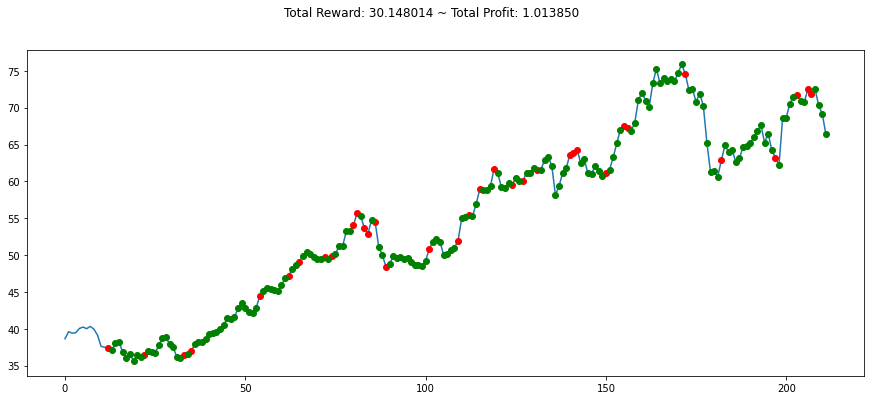

In [28]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

## Against test

In [29]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(2000,2961))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 766.0936698913574, 'total_profit': 2.667596398327705, 'position': 1}


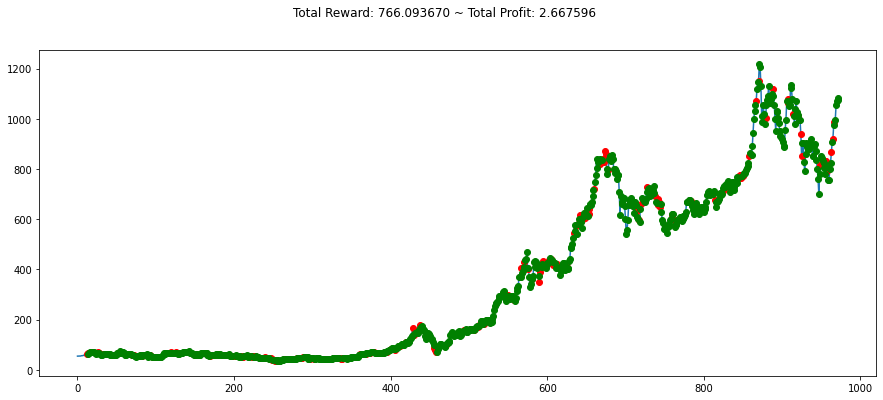

In [30]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()